In [15]:
import numpy as np
from dt_apriltags import Detector
import matplotlib.pyplot as plt
import cv2

In [16]:
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )

In [17]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [ ]:
def render_tags(tags, img):
    for tag in tags:
        for idx in range(len(tag.corners)):
            cv2.line(img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0), thickness=10)

        cv2.putText(img, str(tag.tag_id),
                    org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8,
                    color=(0, 0, 255))
        
    return img

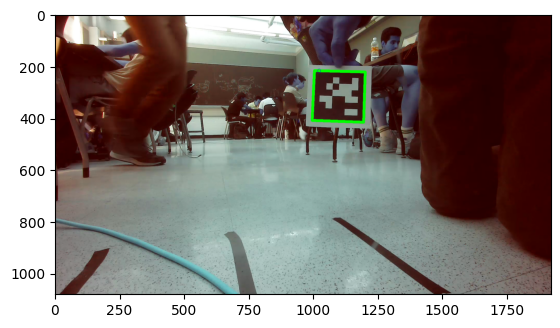

KeyboardInterrupt: 

In [18]:
cap = cv2.VideoCapture('April_Tag_Test.mkv')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
ret, img = cap.read()
count = 0
frequency = 100
while cap.isOpened():
    ret, img = cap.read()
    if count % frequency == 0:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        tags = at_detector.detect(gray, True, camera_params, tag_size=True)
        frame = render_tags(tags, img)
        plt.imshow(frame)
        plt.show()
    count += 1

# cv2.imwrite("april_frame1.jpg", img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # img = cv2.imread('april_tags.png', cv2.IMREAD_GRAYSCALE)
# plt.imshow(img)

In [25]:
img = cv2.imread("april_frame1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tags = at_detector.detect(gray, True, camera_params, tag_size=True)

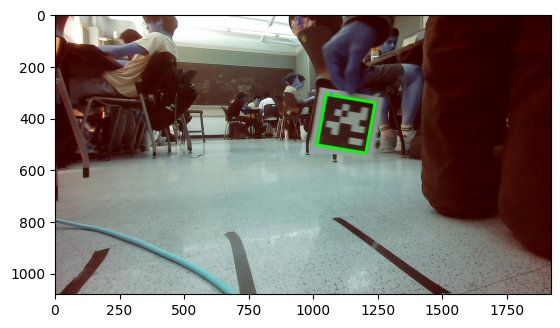

In [26]:
plt.imshow(render_tags(tags, img))

In [24]:
tags

[Detection object:
 tag_family = b'tag36h11'
 tag_id = 0
 hamming = 0
 decision_margin = 54.846038818359375
 homography = [[-1.72687687e+01 -9.59038097e+01  1.12469379e+03]
  [ 9.69309743e+01 -1.66650235e+01  4.23560879e+02]
  [ 3.85052411e-04 -1.58447069e-03  1.00000000e+00]]
 center = [1124.69378533  423.5608787 ]
 corners = [[1048.12304688  310.5765686 ]
  [1012.73590088  504.43185425]
  [1200.96350098  536.10101318]
  [1236.38342285  342.88366699]]
 pose_R = [[-0.16676124 -0.98466887 -0.05116551]
  [ 0.98349206 -0.16241661 -0.07977602]
  [ 0.07024283 -0.06362442  0.99549881]]
 pose_t = [[ 0.8495711 ]
  [-0.59624288]
  [ 5.46217222]]
 pose_err = 0.0001547403180021827]

In [ ]:
tags[0].center
# tags[0].pose_R

In [ ]:
height = img.shape[0]
width = img.shape[1]
x_c = width / 2
y_c = height / 2
center = tags[0].center

In [ ]:
horizontal_error = x_c - center[0]
vertical_error = y_c - center[1]

In [ ]:
print(f"{horizontal_error = }, {vertical_error = }")

In [ ]:
if horizontal_error < 0:
    print(f"The robot should move right by {horizontal_error}")
elif horizontal_error > 0:
    print(f"The robot should move left by {horizontal_error}")
else:
    print(f"The robot is horizontally centered.")


In [ ]:
if vertical_error > 0:
    print(f"The robot should move up by {vertical_error}")
elif vertical_error < 0:
    print(f"The robot should move down by {vertical_error}")
else:
    print(f"The robot is vertically centered.")